# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [2]:
import pandas as pd
import numpy as np
import dstricks
from dstricks import plot, cfg
from dstricks.model_metrics import model_performance_regression
# import phik

# ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# split test and train data
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import (f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    )

## Data Overview

- Observations
- Sanity checks

In [3]:
class CFG:
    FILE_PATH = "../data/ExtraaLearn.csv"
    seed = 42

In [4]:
el_data = pd.read_csv(CFG.FILE_PATH)
el_data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
el_data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [6]:
el_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

### Observations:
- 10 object columns
- 4 integer columns (but it looks like one of them is actually a categorical column)
- One float column
- We should drop ID column because it is irrelevant and will not impact our model.

In [7]:
el_data.drop('ID', axis=1, inplace=True)
el_data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [8]:
el_data['status'] = el_data['status'].astype('category')
el_data['status'].cat.categories

Index([0, 1], dtype='int64')

In [9]:
# creating a list for categorical/object and numerical columns
cat_cols = el_data.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = el_data.select_dtypes(include=['number']).columns.tolist()
print(cat_cols, num_cols, sep='\n')

['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']
['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [10]:
el_data.isna().any()

age                      False
current_occupation       False
first_interaction        False
profile_completed        False
website_visits           False
time_spent_on_website    False
page_views_per_visit     False
last_activity            False
print_media_type1        False
print_media_type2        False
digital_media            False
educational_channels     False
referral                 False
status                   False
dtype: bool

- No missing data

In [11]:
el_data.duplicated().sum()

14

- There are 14 duplicated rows

In [12]:
for col in cat_cols:
    print(el_data[col].value_counts())
    print("--------------------------")

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------
educational_channels
No     3907
Yes     705
Name: count, dtype: int64
--------------------------
referral
No     4519
Yes      93
Name: count, dtype: int64
--------------------------
status
0    3235
1    1377
Name: 

In [13]:
el_data.nunique()

age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

- Most of the categorical variables have 2-3 unique values.

In [14]:
el_data[el_data.duplicated()==True]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1097,59,Professional,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,1
1375,58,Professional,Website,High,0,0,0.0,Phone Activity,No,No,No,No,No,1
1592,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
1675,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
1679,32,Unemployed,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
2789,59,Unemployed,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
2980,58,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
3013,58,Unemployed,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,0
3227,59,Unemployed,Website,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
3278,57,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0


# EDA
---

## Univariate Analysis

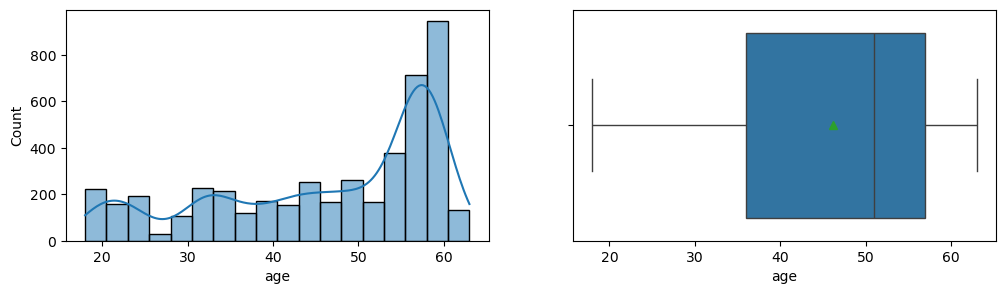

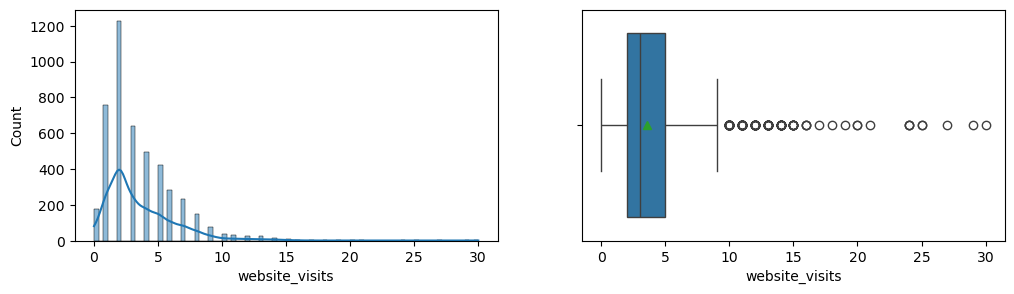

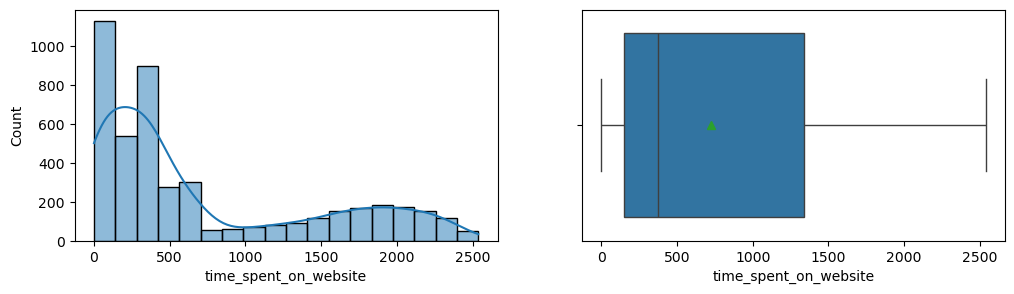

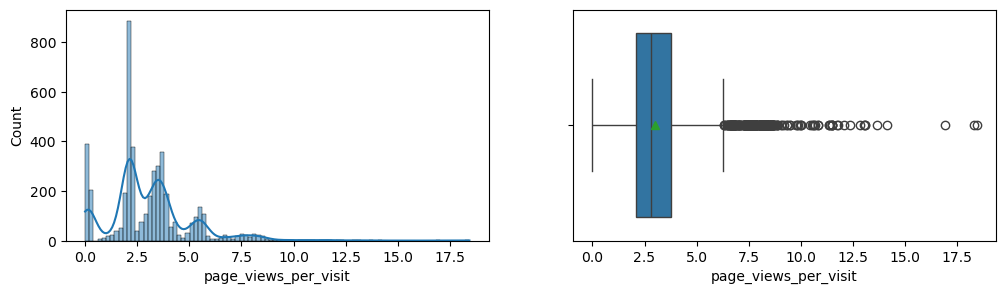

In [15]:
plot.dist_box_plot(data=el_data, num_cols=num_cols)

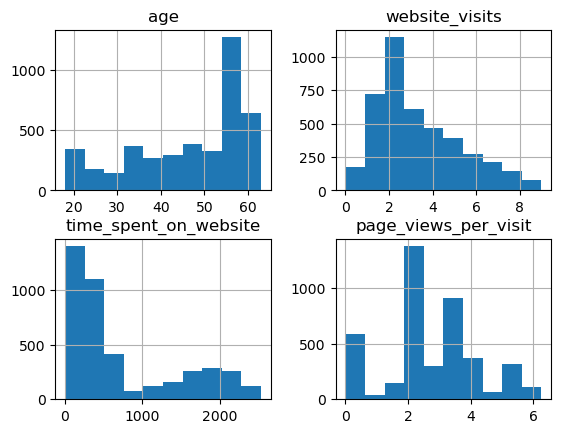

In [72]:
el_data[num_cols].hist()
plt.show()

In [ ]:
el_data.plot()

In [16]:
from dstricks.model_metrics import outlierChecker, outlierSummary, outlierRemoval
for col in num_cols:
    outlierSummary(el_data, col)
    el_data = outlierRemoval(el_data, col)
    outlierSummary(el_data, col)

Column: age
Upper Outliers: 0
Lower Outliers: 0
Normalized Upper Outliers: 0.0
Normalized Lower Outliers: 0.0
-----------------------------------
Column: age
Upper Outliers: 0
Lower Outliers: 0
Normalized Upper Outliers: 0.0
Normalized Lower Outliers: 0.0
-----------------------------------
Column: website_visits
Upper Outliers: 154
Lower Outliers: 0
Normalized Upper Outliers: 0.03339115351257589
Normalized Lower Outliers: 0.0
-----------------------------------
Column: website_visits
Upper Outliers: 0
Lower Outliers: 0
Normalized Upper Outliers: 0.0
Normalized Lower Outliers: 0.0
-----------------------------------
Column: time_spent_on_website
Upper Outliers: 0
Lower Outliers: 0
Normalized Upper Outliers: 0.0
Normalized Lower Outliers: 0.0
-----------------------------------
Column: time_spent_on_website
Upper Outliers: 0
Lower Outliers: 0
Normalized Upper Outliers: 0.0
Normalized Lower Outliers: 0.0
-----------------------------------
Column: page_views_per_visit
Upper Outliers: 250

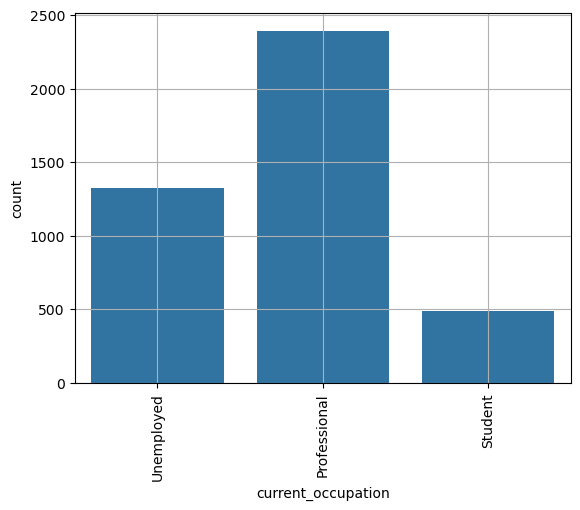

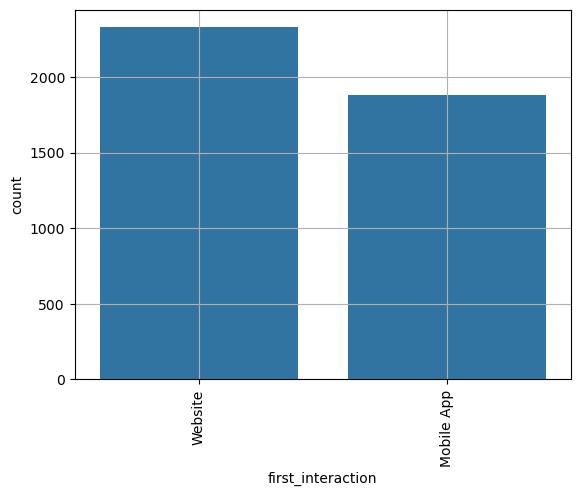

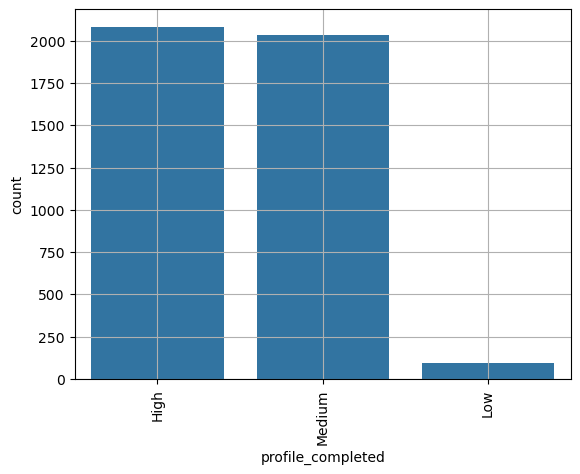

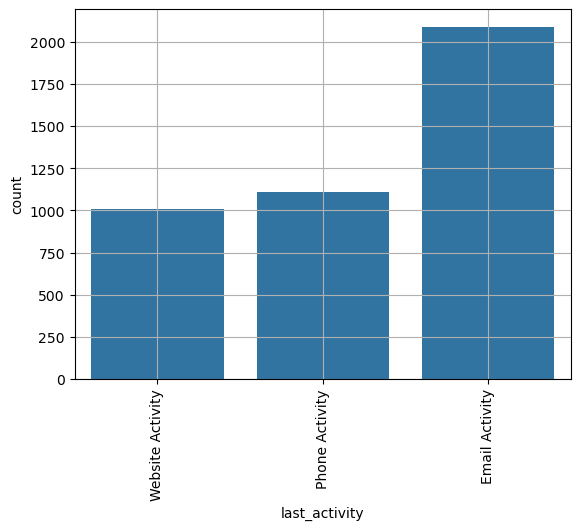

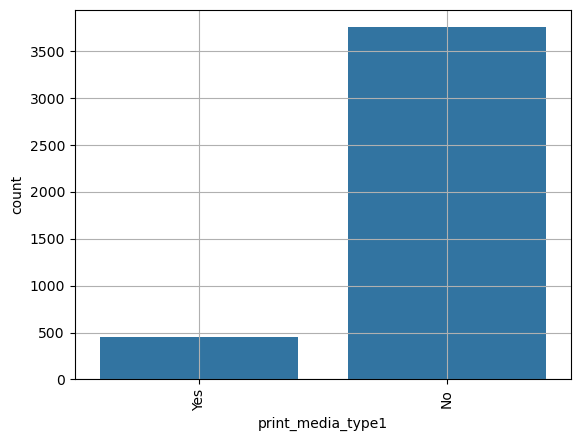

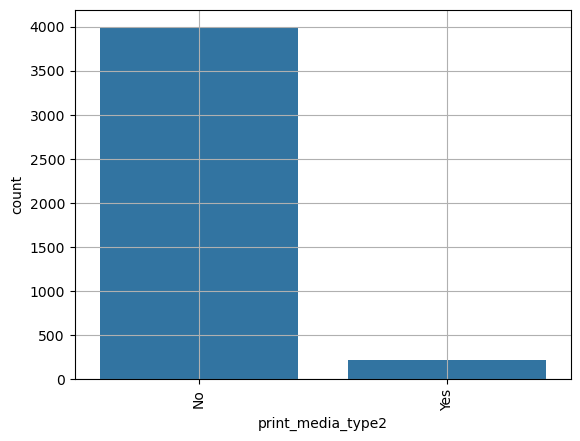

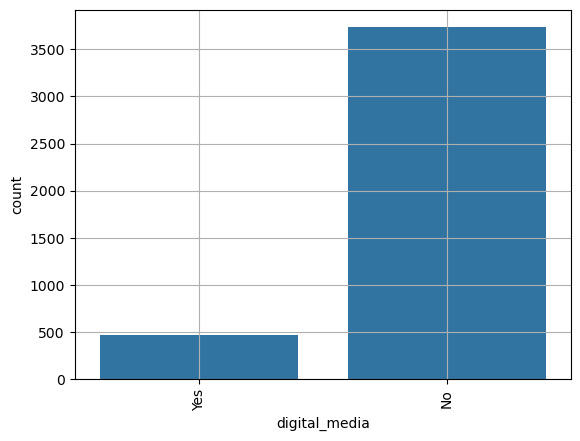

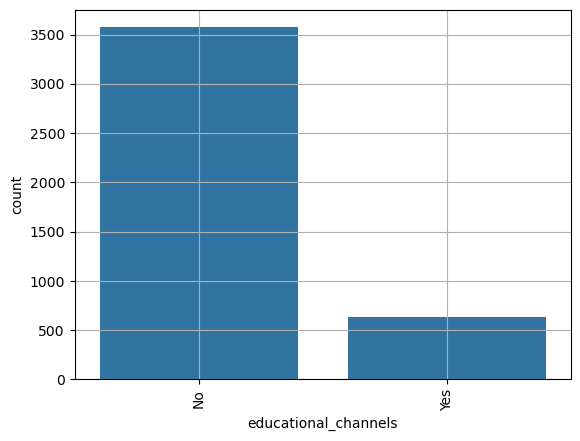

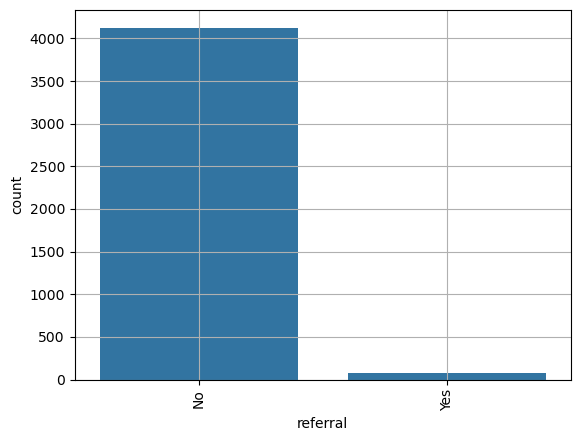

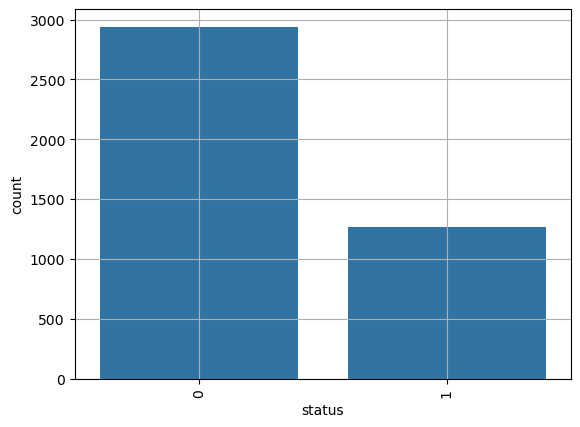

In [17]:
plot.cat_plot(data=el_data, cat_cols=cat_cols)

## Bivariate Analysis

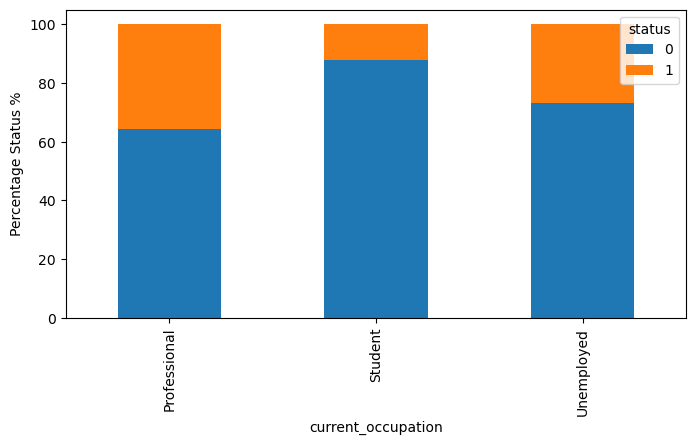

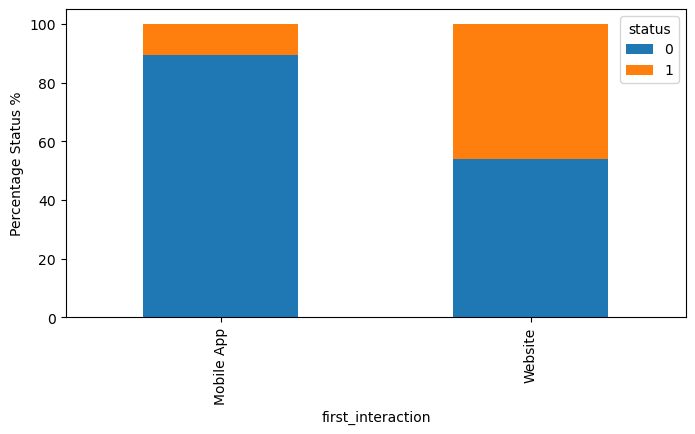

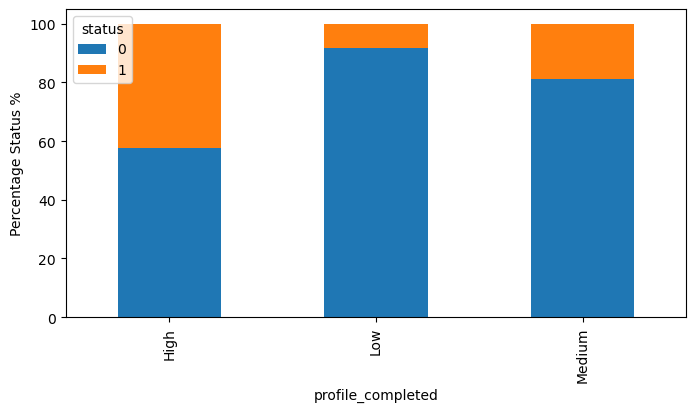

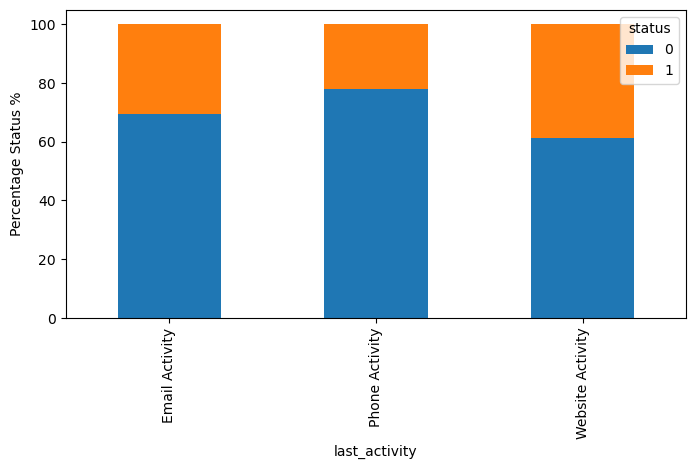

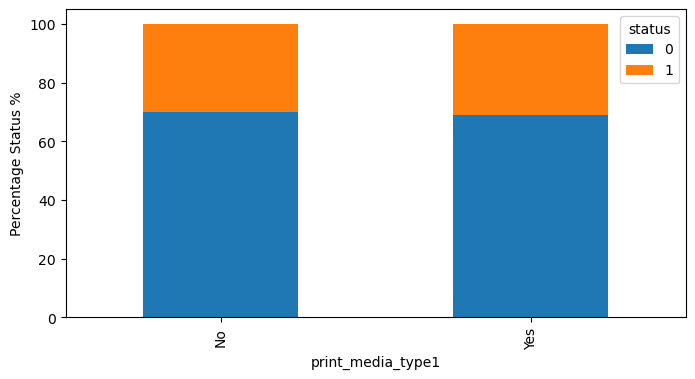

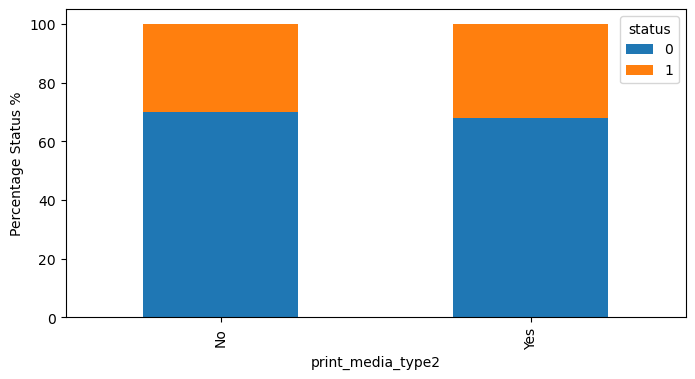

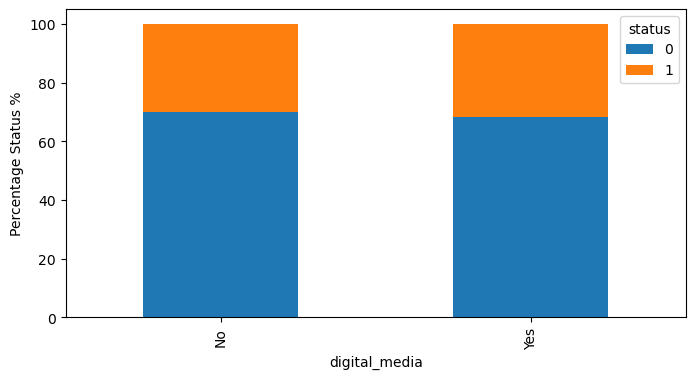

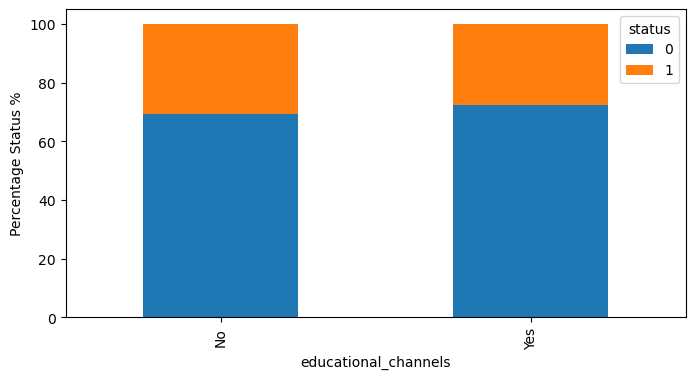

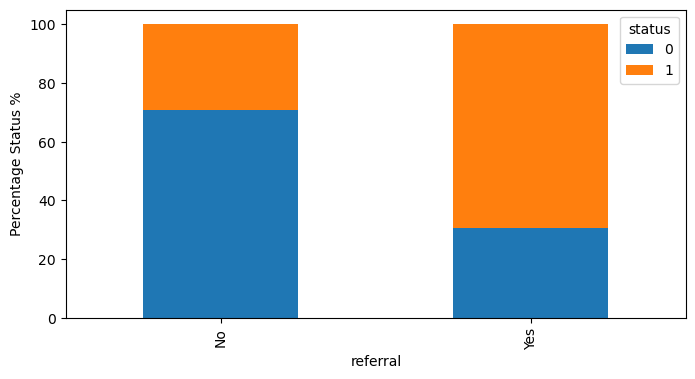

In [73]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(el_data[i],el_data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Status %')

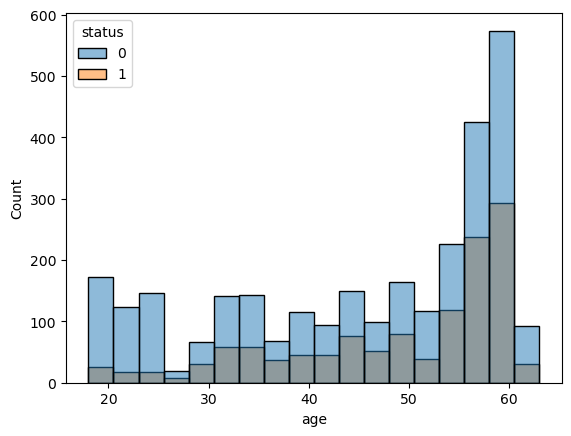

In [79]:
sns.histplot(data=el_data, x='age', hue='status')
plt.show()

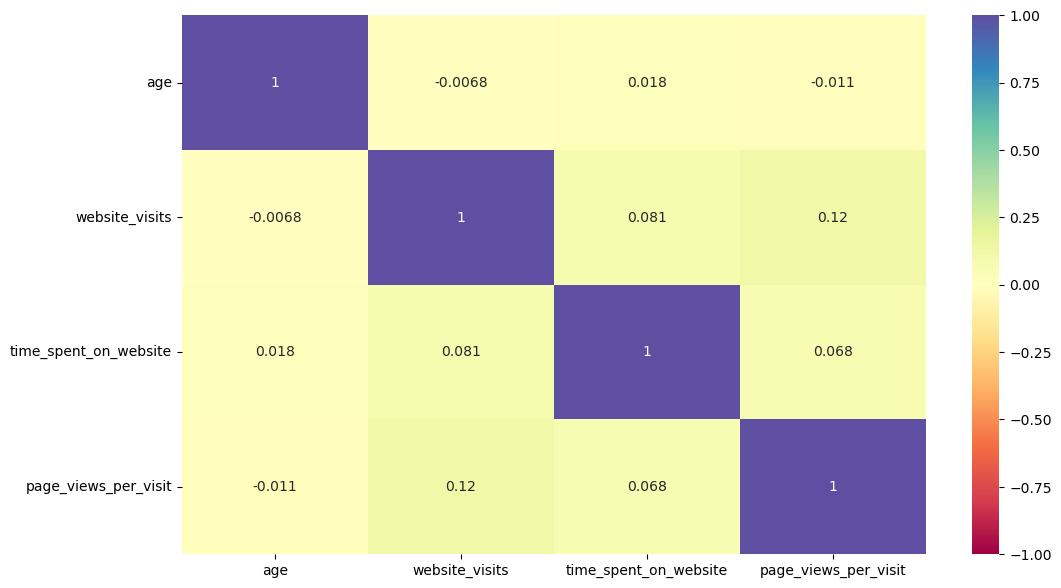

In [18]:
corr = el_data[num_cols].corr()
plt.figure(figsize=(12, 7))
sns.heatmap(el_data[num_cols].corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='Spectral')
plt.show()


- Very low correlation no matter what direction for every pair of variables.

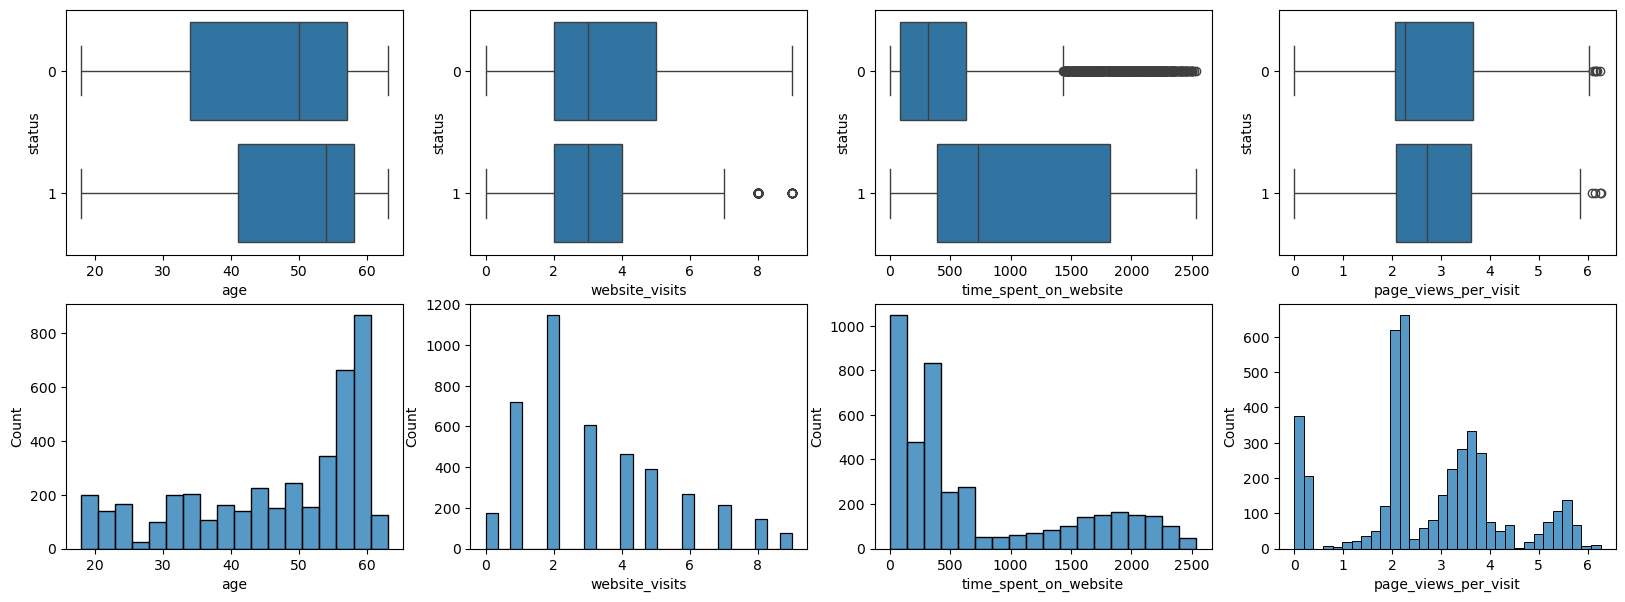

In [19]:
plot.biBox(el_data, num_cols=num_cols, y='status', figsize=(20, 7))

In [20]:
import scipy.stats as ss

## Building a Decision Tree model

In [21]:
config = cfg.CFG()
config.seed = 42
config.seed

42

In [22]:
cat_cols

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral',
 'status']

In [23]:
num_cols

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer

# Data Prep
X = el_data.drop(columns='status')
y = el_data['status']

# split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=config.seed, stratify=y)

# Imputation and Encoding
si1  = SimpleImputer(strategy='median')
si2 = SimpleImputer(strategy='most_frequent')

median_imputed_col = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
mode_imputed_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Fit and transform
X_train[median_imputed_col] = si1.fit_transform(X_train[median_imputed_col])
X_test[median_imputed_col] = si1.transform(X_test[median_imputed_col])

X_train[mode_imputed_col] = si2.fit_transform(X_train[mode_imputed_col])
X_test[mode_imputed_col] = si2.transform(X_test[mode_imputed_col])

# print(X_train.isna().sum())
# print('-'*30)
# print(X_test.isna().sum())

In [25]:
del cat_cols[-1]
cat_cols

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [26]:
all_cols = num_cols + cat_cols
all_cols

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [27]:
for col in num_cols:
    X_train[col] = X_train[col].astype(float)
    X_test[col] = X_test[col].astype(float)

In [28]:
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

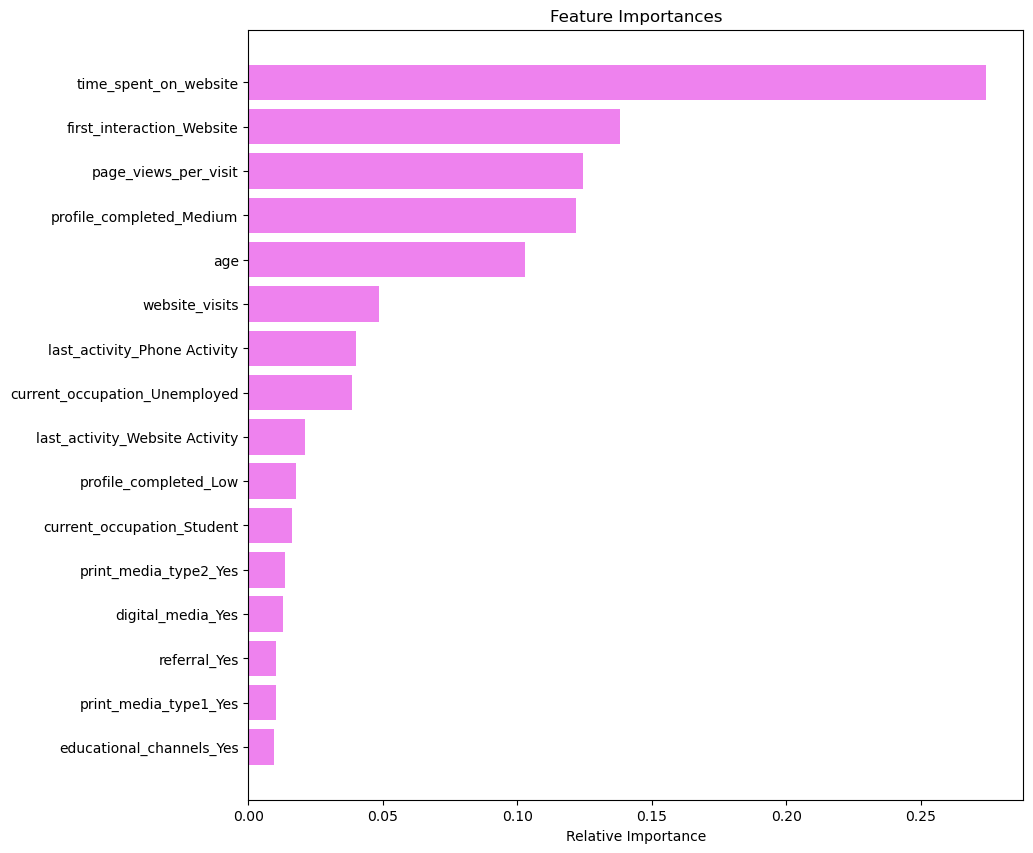

In [29]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)

importances = dtc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [list(X_train.columns)[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()



In [30]:
new_data = pd.get_dummies(el_data.drop('status', axis=1))
new_data

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.861,False,False,True,False,True,True,...,False,True,True,False,False,True,True,False,True,False
1,56,2,83,0.320,True,False,False,True,False,False,...,True,False,True,False,True,False,False,True,True,False
2,52,3,330,0.074,True,False,False,False,True,False,...,True,False,True,False,False,True,True,False,True,False
3,53,4,464,2.057,False,False,True,False,True,True,...,True,False,True,False,True,False,True,False,True,False
5,50,4,212,5.682,False,False,True,True,False,True,...,True,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4606,58,7,210,3.598,False,False,True,True,False,True,...,True,False,True,False,True,False,True,False,True,False
4608,55,8,2327,5.393,True,False,False,True,False,False,...,True,False,True,False,True,False,True,False,True,False
4609,58,2,212,2.692,True,False,False,False,True,True,...,True,False,True,False,True,False,True,False,True,False
4610,57,1,154,3.879,True,False,False,True,False,False,...,False,True,True,False,True,False,True,False,True,False


In [31]:
# most important features
mif = ['time_spent_on_website', "first_interaction_Website", 
       "page_views_per_visit", "profile_completed_Medium", 
       "age", "website_visits", "last_activity_Phone Activity", 
       "current_occupation_Unemployed", "current_occupation_Student",
       "last_activity_Website Activity", "profile_completed_Low"]

X_new = new_data[mif]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train_new)
X_test_new  = sc.transform(X_test_new)

In [33]:
dtc.fit(X_train_new, y_train_new)

DecisionTreeClassifier()

0.9991087344028521
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00      1015

    accuracy                           1.00      3366
   macro avg       1.00      1.00      1.00      3366
weighted avg       1.00      1.00      1.00      3366



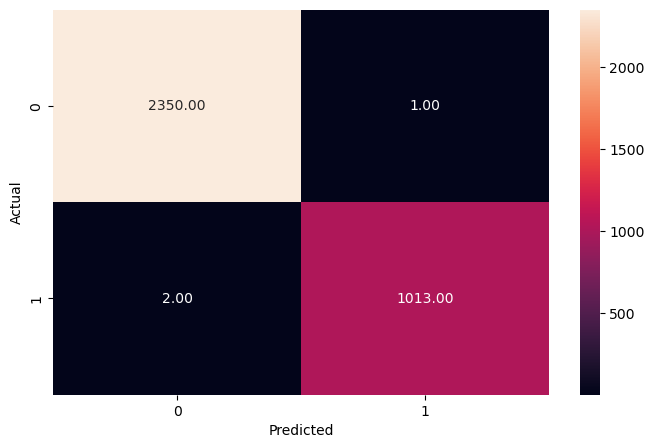

In [34]:
y_pred_train = dtc.predict(X_train_new)
print(accuracy_score(y_pred_train, y_train_new))
plot.metrics_score(y_train_new, y_pred_train)

0.8266033254156769
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       588
           1       0.70      0.74      0.72       254

    accuracy                           0.83       842
   macro avg       0.79      0.80      0.80       842
weighted avg       0.83      0.83      0.83       842



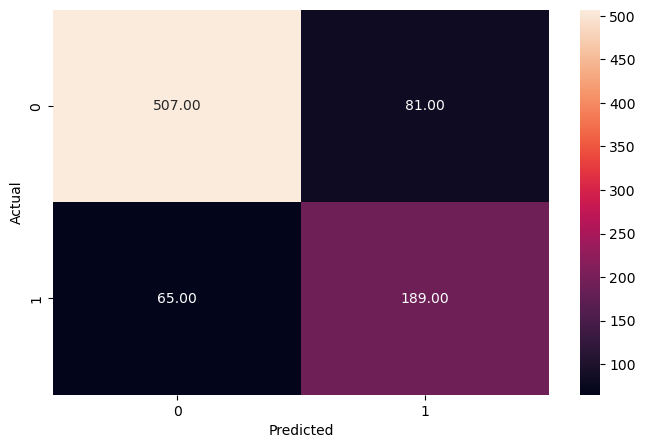

In [35]:
y_pred_test = dtc.predict(X_test_new)
print(accuracy_score(y_pred_test, y_test_new))
plot.metrics_score(y_test_new, y_pred_test)

In [36]:
# y_scores_dtc = dtc.predict_proba(X_test_new)
# precisions_dtc, recalls_dtc, thresholds_dtc = precision_recall_curve(y_test_new, y_scores_dtc[:,1])

# # Plot values of precisions, recalls, and thresholds
# plt.figure(figsize=(10,7))
# plt.plot(thresholds_dtc, precisions_dtc[:-1], 'b--', label='precision')
# plt.plot(thresholds_dtc, recalls_dtc[:-1], 'g--', label = 'recall')
# plt.xlabel('Threshold')
# plt.legend(loc='upper left')
# plt.ylim([0,1])
# plt.show()

## Do we need to prune the tree?

In [37]:
params = {'max_depth': [2,4,6,8,10,12],
          'criterion':['gini', 'entropy'],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': np.arange(5, 30, 5)}

scorer = make_scorer(recall_score, pos_label=1)

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params, scoring=scorer, cv=5)
gcv.fit(X_train_new,y_train_new)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': array([ 5, 10, 15, 20, 25]),
                         'min_samples_split': [2, 3, 4]},
             scoring=make_scorer(recall_score, pos_label=1))

In [38]:
model = gcv.best_estimator_
model.fit(X_train_new,y_train_new)
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)

print(f'Train score {accuracy_score(y_train_pred, y_train_new)}')
print(f'Test score {accuracy_score(y_test_pred, y_test_new)}')

Train score 0.8383838383838383
Test score 0.8586698337292161


              precision    recall  f1-score   support

           0       0.94      0.86      0.89       588
           1       0.72      0.87      0.79       254

    accuracy                           0.86       842
   macro avg       0.83      0.86      0.84       842
weighted avg       0.87      0.86      0.86       842



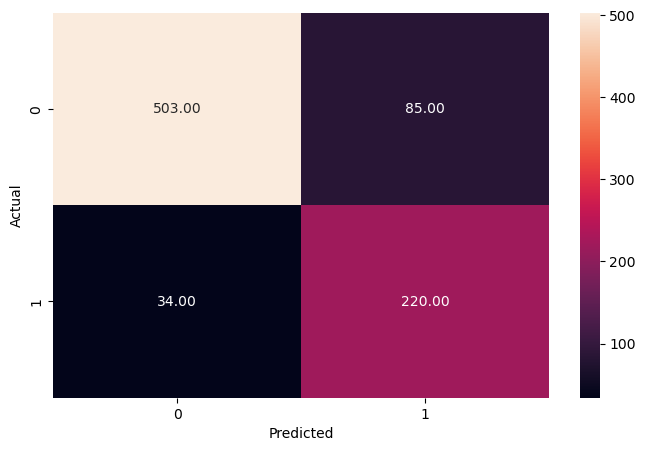

In [39]:
plot.metrics_score(y_test_new, y_test_pred)

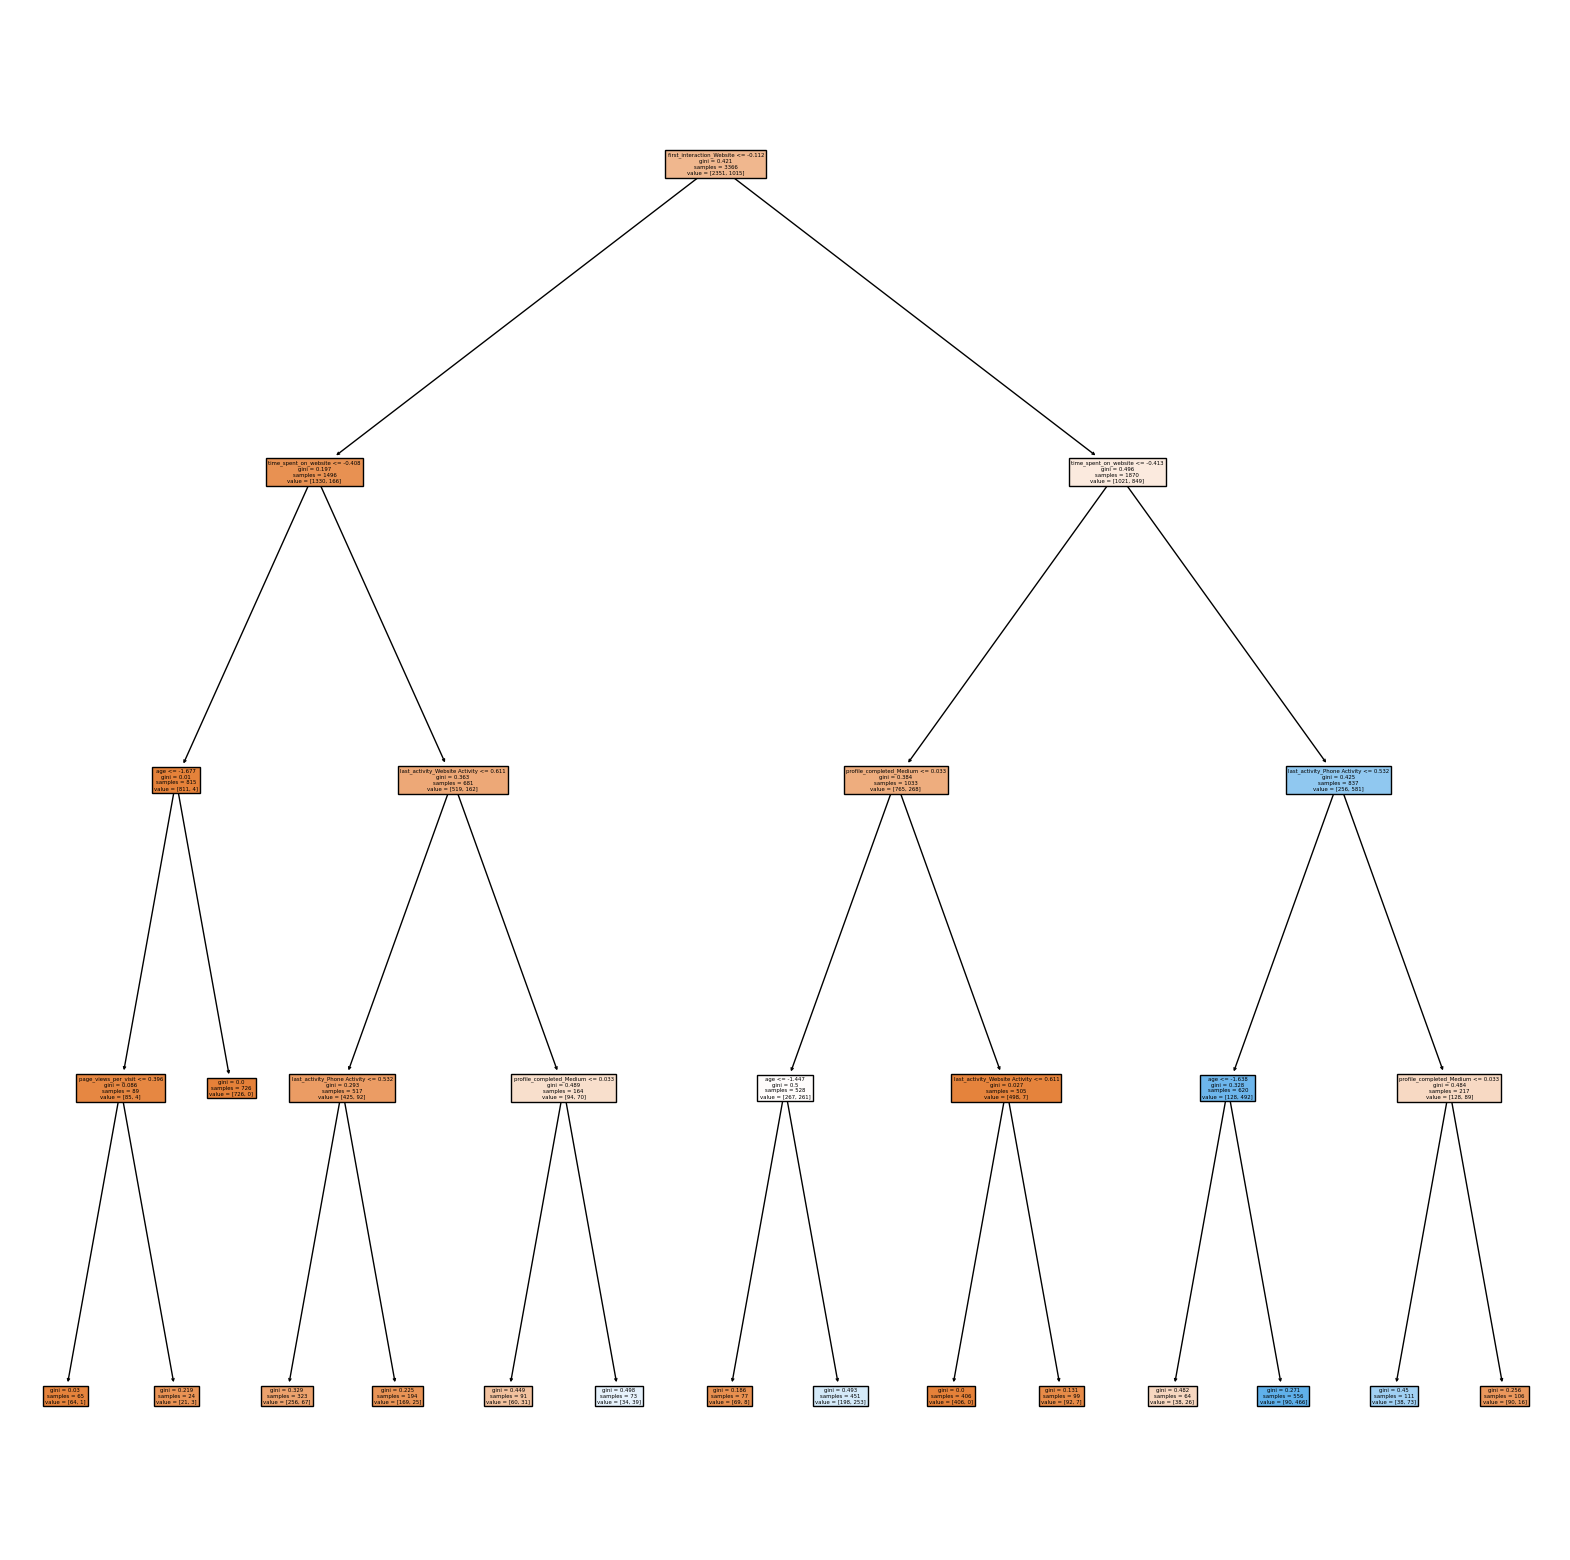

In [40]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=mif, filled=True)
plt.show()

In [41]:
# Post pruning

In [42]:
path = model.cost_complexity_pruning_path(X_train_new, y_train_new)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00011015 0.00023643 0.00044451 0.00090197 0.00458228
 0.00636069 0.00816456 0.00827201 0.01196512 0.01404006 0.03540377
 0.05191511 0.05811458]


In [43]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_new, y_train_new)
    clfs.append(clf)

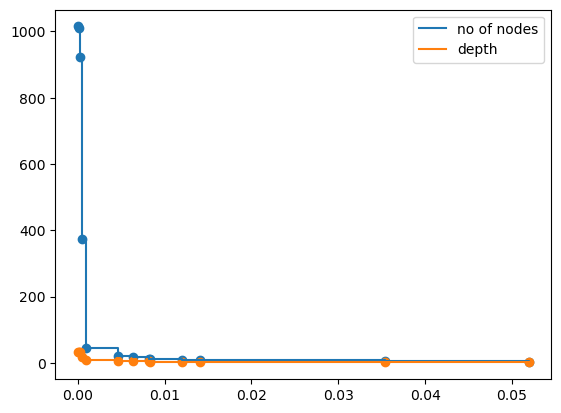

In [44]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

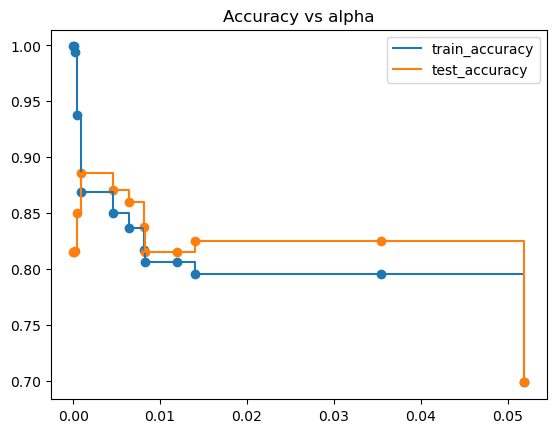

In [45]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train_new)
    y_test_pred = c.predict(X_test_new)
    train_acc.append(accuracy_score(y_train_pred,y_train_new))
    test_acc.append(accuracy_score(y_test_pred,y_test_new))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [46]:
# model = DecisionTreeClassifier(random_state=CFG.seed, ccp_alpha=0.0125)
model = DecisionTreeClassifier(**gcv.best_params_, random_state=42, ccp_alpha=0.0125)
model.fit(X_train_new, y_train_new)
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.8065953654188949
Test score 0.8147268408551069


              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2351
           1       0.79      0.48      0.60      1015

    accuracy                           0.81      3366
   macro avg       0.80      0.72      0.74      3366
weighted avg       0.80      0.81      0.79      3366



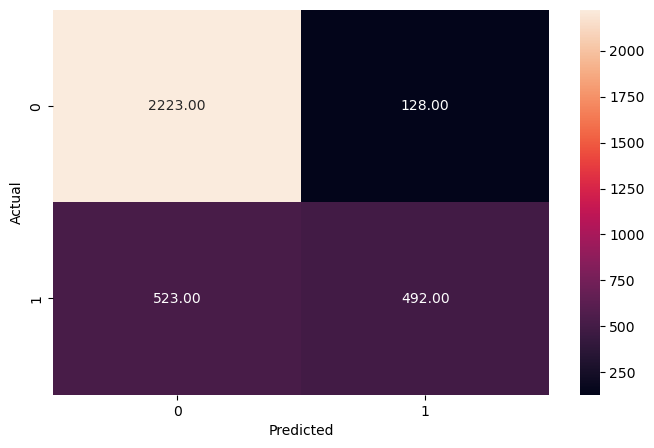

In [47]:
plot.metrics_score(y_train_new, y_train_pred)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       588
           1       0.82      0.50      0.62       254

    accuracy                           0.81       842
   macro avg       0.82      0.72      0.75       842
weighted avg       0.82      0.81      0.80       842



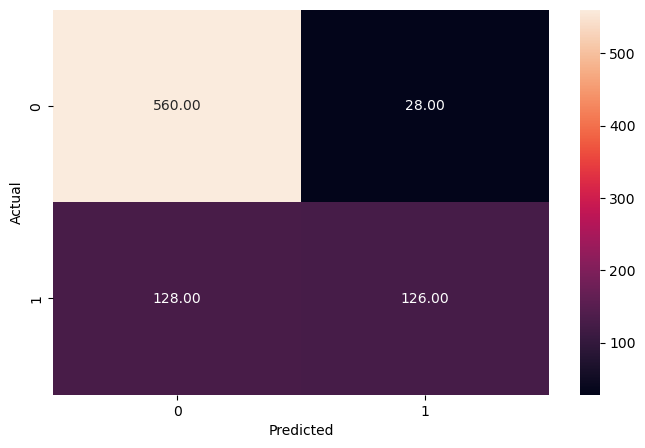

In [48]:
plot.metrics_score(y_test_new, y_test_pred)

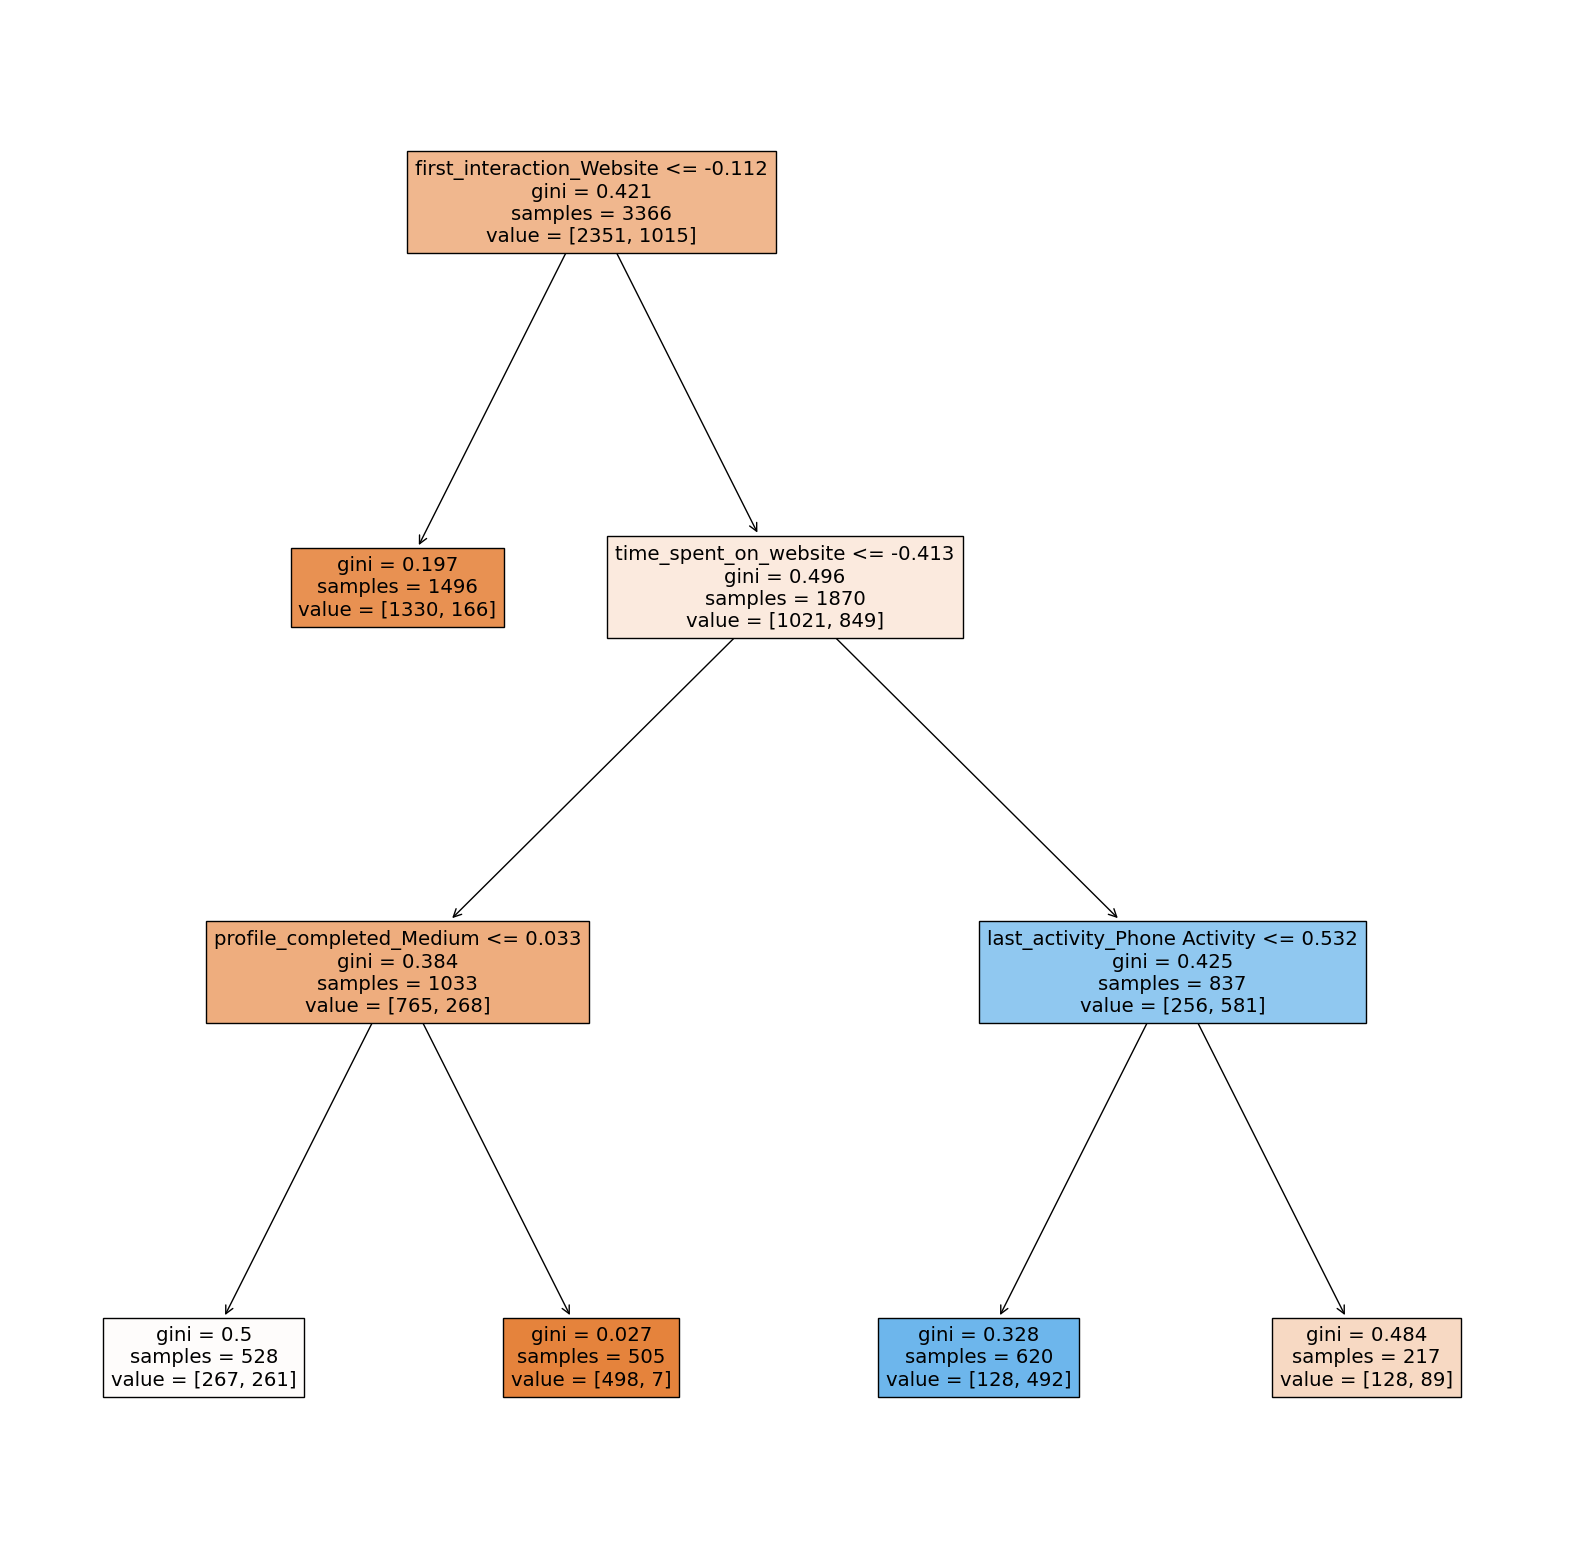

In [49]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=mif, filled=True)
plt.show()

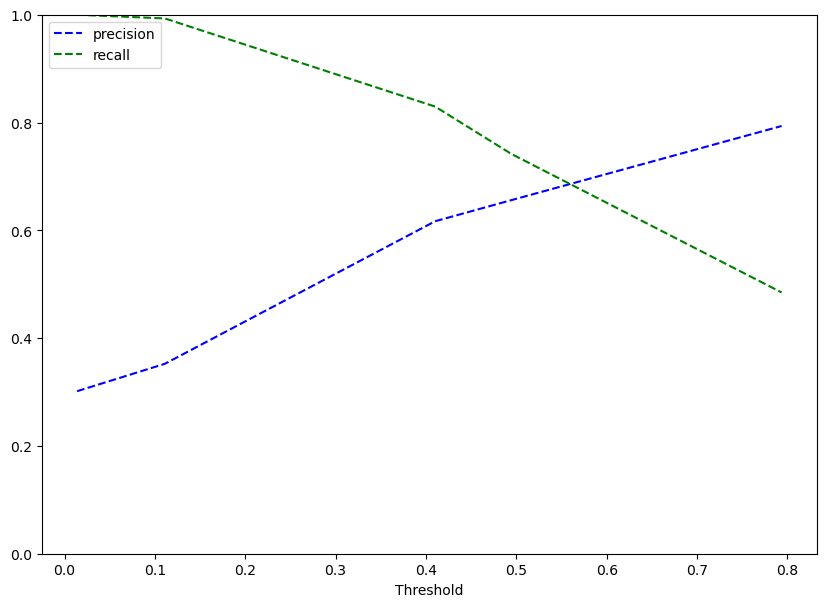

In [50]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_model=model.predict_proba(X_train_new)

precisions_model, recalls_model, thresholds_model = precision_recall_curve(y_train_new, y_scores_model[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_model, precisions_model[:-1], 'b--', label='precision')
plt.plot(thresholds_model, recalls_model[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [51]:
optimal_threshold = 0.55

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2351
           1       0.79      0.48      0.60      1015

    accuracy                           0.81      3366
   macro avg       0.80      0.72      0.74      3366
weighted avg       0.80      0.81      0.79      3366



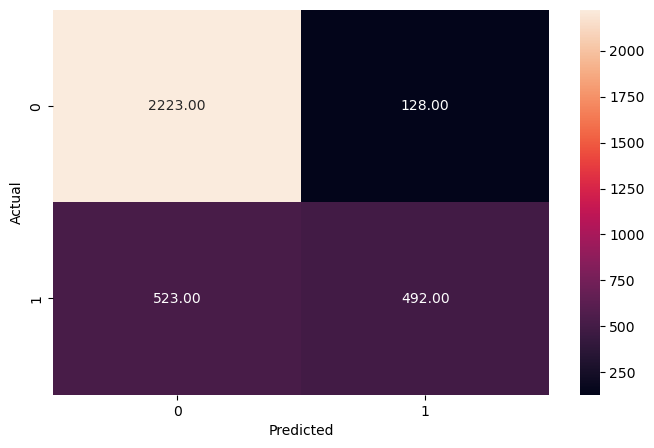

In [52]:
y_pred_train = model.predict_proba(X_train_new)
plot.metrics_score(y_train_new, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       588
           1       0.82      0.50      0.62       254

    accuracy                           0.81       842
   macro avg       0.82      0.72      0.75       842
weighted avg       0.82      0.81      0.80       842



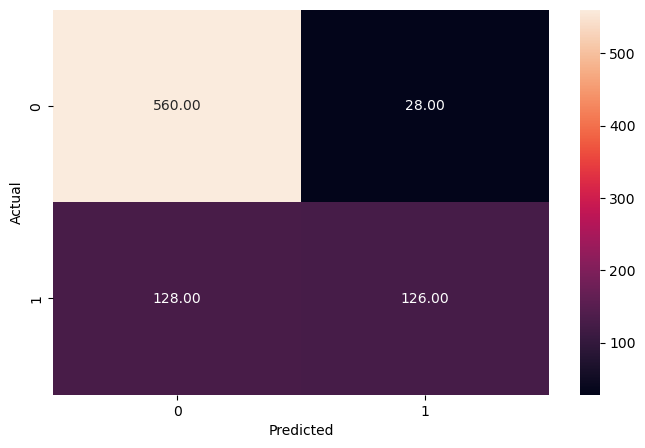

In [53]:
y_pred_test = model.predict_proba(X_test_new)
plot.metrics_score(y_test_new, y_pred_test[:,1]>optimal_threshold)

## Building a Random Forest model
---

In [54]:
rf = RandomForestClassifier(random_state=CFG.seed, criterion='gini')
rf.fit(X_train_new, y_train_new)

RandomForestClassifier(random_state=42)

### Train Metrics for Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00      1015

    accuracy                           1.00      3366
   macro avg       1.00      1.00      1.00      3366
weighted avg       1.00      1.00      1.00      3366



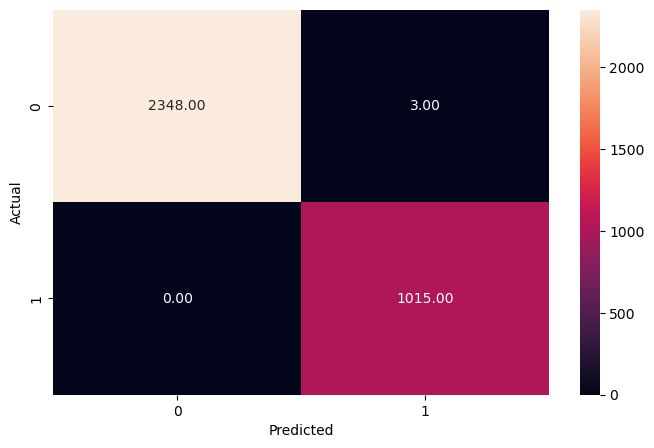

In [55]:
y_pred_train2 = rf.predict(X_train_new)
plot.metrics_score(y_train_new, y_pred_train2)

### Test metrics for random forest

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       588
           1       0.82      0.77      0.80       254

    accuracy                           0.88       842
   macro avg       0.86      0.85      0.86       842
weighted avg       0.88      0.88      0.88       842



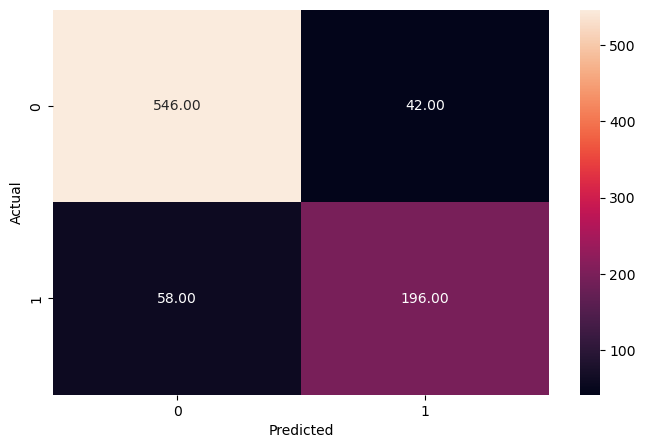

In [56]:
y_pred_test2 = rf.predict(X_test_new)
plot.metrics_score(y_test_new, y_pred_test2)

In [57]:
params = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

scorer = make_scorer(recall_score, pos_label=1)

gcv = GridSearchCV(estimator=rf, param_grid=params, scoring=scorer, cv=5)
gcv.fit(X_train_new, y_train_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', {0: 0.3, 1: 0.7}],
                         'max_depth': [6, 7], 'max_features': [0.8, 0.9],
                         'max_samples': [0.9, 1], 'min_samples_leaf': [20, 25],
                         'n_estimators': [110, 120]},
             scoring=make_scorer(recall_score, pos_label=1))

In [58]:
rf_tuned = gcv.best_estimator_
rf_tuned.fit(X_train_new, y_train_new)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       max_features=0.8, max_samples=0.9, min_samples_leaf=25,
                       n_estimators=110, random_state=42)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2351
           1       0.67      0.87      0.76      1015

    accuracy                           0.83      3366
   macro avg       0.80      0.84      0.81      3366
weighted avg       0.86      0.83      0.84      3366



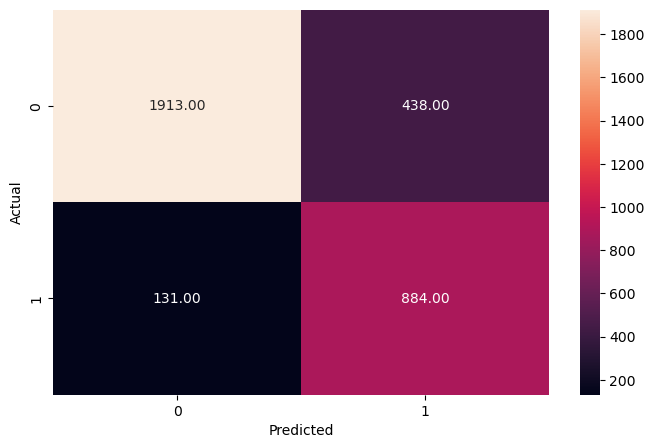

In [59]:
y_pred_train2 = rf_tuned.predict(X_train_new)
plot.metrics_score(y_train_new, y_pred_train2)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       588
           1       0.69      0.91      0.78       254

    accuracy                           0.85       842
   macro avg       0.82      0.87      0.83       842
weighted avg       0.87      0.85      0.85       842



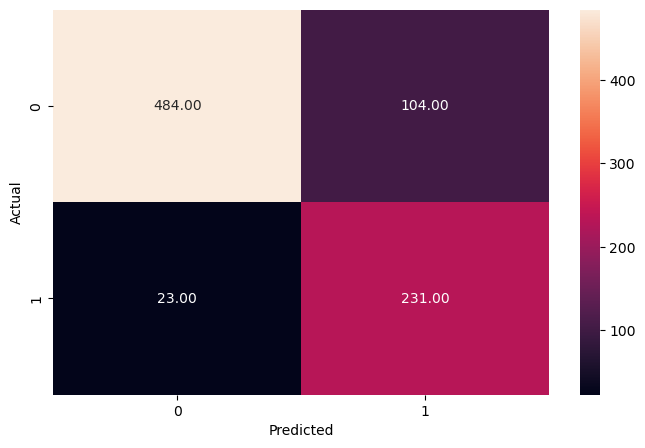

In [60]:
y_pred_test2 = rf_tuned.predict(X_test_new)
plot.metrics_score(y_test_new, y_pred_test2)

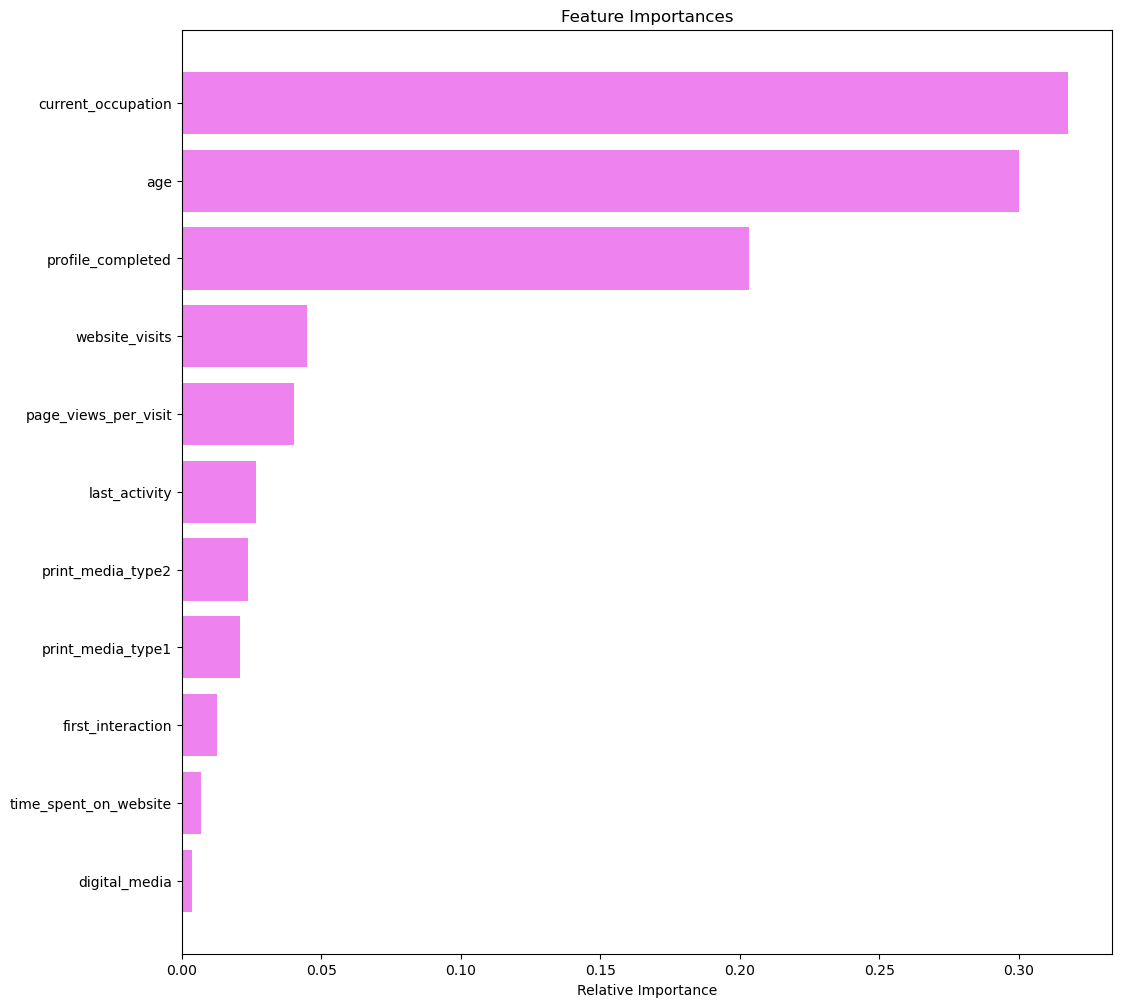

In [61]:
importances = rf_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2351
           1       0.70      0.86      0.77      1015

    accuracy                           0.84      3366
   macro avg       0.81      0.85      0.83      3366
weighted avg       0.86      0.84      0.85      3366



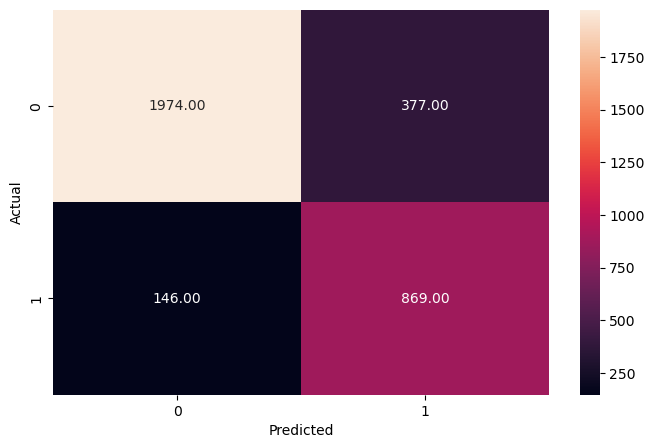

In [64]:
y_pred_train2_prob = rf_tuned.predict_proba(X_train_new)
plot.metrics_score(y_train_new, y_pred_train2_prob[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       588
           1       0.71      0.89      0.79       254

    accuracy                           0.86       842
   macro avg       0.83      0.87      0.84       842
weighted avg       0.88      0.86      0.86       842



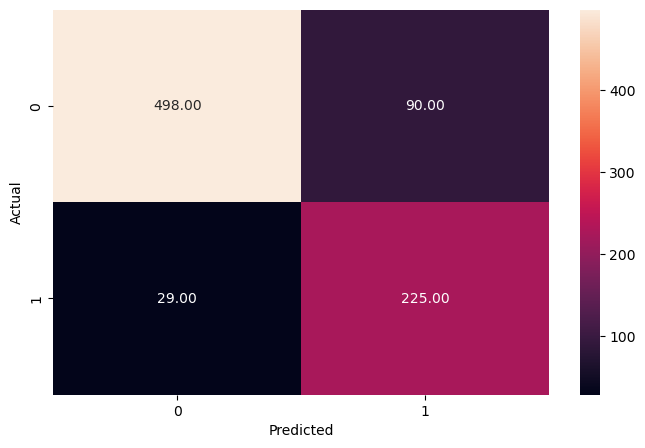

In [66]:
y_pred_test2_prob = rf_tuned.predict_proba(X_test_new)
plot.metrics_score(y_test_new, y_pred_test2_prob[:,1]>optimal_threshold)

## Actionable Insights and Recommendations

- Current ocupation, age, and profile completed are the most important features for the random forest model.
- Time spent on website, first interaction webstite, page views per visit, profile completed medium, and age were most important variables for decision tree model.
- The decision tree model may be overfitting because of lower accuracy on both train and test metrics. 
- The random forest model doesn't seem to be overfitting because of high and consistent accuracy and recall on training and testing metrics.
- Most people are in the age range of 50-60. So, middle aged people are the most type of people in the dataset.
- Most people are professionals and the second most are unemployed. Perhaps we can reach out to more professionals and unemployed and make them an offer to use ExtraaLearn.
- Almost all do not have referrals. So maybe we can start referring more of these people. Maybe get some sponsors to use and promote ExtraaLearn. Maybe you can also add a rewards system for successful referrals. 
- People usually use their emails, so maybe send offers through emails. But that might be risky because it can look like a scam.
- Most people have their profile fully or almost completed, so that's good considering that they are interested in the application.
- So, since unemployed and student is number two, they probably can't afford to pay for ExtraaLearn. Maybe add a free trial or student discount. Or again you can just market it to professionals but I think being more versatile and providing services for students and the unemployed is a better option.